In [1]:
import pickle
import networkx as nx
import pprint
from new_utils import Greedy
import preprocessing as pp
import numpy as np
import random

In [2]:
network = pickle.load(open('./networks/test_net_2008_to_2010.pkl', 'rb'))
G = network.copy()

In [3]:
print("Network Attributes")
print("------------------")
print(f"Num of Nodes: {G.number_of_nodes()}")
print(f"Num of Edges: {G.number_of_edges()}")

Network Attributes
------------------
Num of Nodes: 219
Num of Edges: 8771


In [4]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = pp.createProjectNetwork(list_1)
full_proj = pp.createProjectNetwork(list_2)
chain_proj = pp.createProjectNetwork(list_3)

project_net = chain_proj

In [5]:
G = pp.remove_edges_based_on_project_network(network.copy(), project_net)

In [6]:
# print("Network Attributes")
# print("------------------")
# print(f"Nun of Nodes: {G.number_of_nodes()}")
# print(f"Nun of Edges: {G.number_of_edges()}")

In [7]:
nodes_with_label_T  = [node for node, data in G.nodes(data=True) if data.get('label') == 'T']
nodes_with_label_DB = [node for node, data in G.nodes(data=True) if data.get('label') == 'DB']
nodes_with_label_DM = [node for node, data in G.nodes(data=True) if data.get('label') == 'DM']
nodes_with_label_AI = [node for node, data in G.nodes(data=True) if data.get('label') == 'AI']

In [8]:
net_T  = G.subgraph(nodes_with_label_T)
net_DB = G.subgraph(nodes_with_label_DB)
net_DM = G.subgraph(nodes_with_label_DM)
net_AI = G.subgraph(nodes_with_label_AI)

In [9]:
# closeness_centrality = nx.closeness_centrality(net_T)  # Compute closeness centrality

# # Assign closeness centrality as a node attribute
# nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# # Extract closeness centrality values and calculate mean and std deviation
# cc_values = np.array(list(closeness_centrality.values()))
# mean = np.mean(cc_values)
# std_dev = np.std(cc_values)

# # Define the number of nodes to select
# x = 10

# # Generate x random values from a normal distribution
# random_cc_values = [random.gauss(mean, std_dev) for _ in range(x)]

# # Select nodes closest to the generated random closeness centrality values
# selected_nodes = []

# # For each random value, find the node with the closest closeness centrality
# for random_value in random_cc_values:
#     closest_node = min(closeness_centrality.keys(), 
#                        key=lambda n: abs(closeness_centrality[n] - random_value))
#     selected_nodes.append(closest_node)

# # Output the selected nodes
# print(f"The selected nodes are: {selected_nodes}")
# len(set(selected_nodes))

In [10]:
# import networkx as nx

# import matplotlib.pyplot as plt

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot the network
# nx.draw(network.subgraph(selected_nodes), with_labels=True, ax=ax)

# # Show the plot
# plt.show()

In [11]:
# print(nx.closeness_centrality(network.subgraph(selected_nodes)))

In [12]:
# Calculate the closeness centrality scores
closeness_scores_T  = nx.closeness_centrality(net_T)
closeness_scores_DB = nx.closeness_centrality(net_DB)
closeness_scores_DM = nx.closeness_centrality(net_DM)
closeness_scores_AI = nx.closeness_centrality(net_AI)

# Assign the closeness centrality scores as node attributes
nx.set_node_attributes(net_T,  closeness_scores_T,  'closeness_centrality')
nx.set_node_attributes(net_DB, closeness_scores_DB, 'closeness_centrality')
nx.set_node_attributes(net_DM, closeness_scores_DM, 'closeness_centrality')
nx.set_node_attributes(net_AI, closeness_scores_AI, 'closeness_centrality')

In [13]:
top_nodes = [node for node in net_T.nodes if net_T.nodes[node]['closeness_centrality'] == 1.0]

In [14]:
# For closeness_scores_AI
max_closeness_scores_AI = max(closeness_scores_AI, key=lambda node: closeness_scores_AI[node])

# For closeness_scores_DB
max_closeness_scores_DB = max(closeness_scores_DB, key=lambda node: closeness_scores_DB[node])

# For closeness_scores_DM
max_closeness_scores_DM = max(closeness_scores_DM, key=lambda node: closeness_scores_DM[node])

# For closeness_scores_T
max_closeness_scores_T = max(closeness_scores_T, key=lambda node: closeness_scores_T[node])

# Output the nodes with the highest closeness centrality scores
print(f"The node with the highest closeness centrality score in closeness_scores_AI is: {max_closeness_scores_AI}")
print(f"The node with the highest closeness centrality score in closeness_scores_DB is: {max_closeness_scores_DB}")
print(f"The node with the highest closeness centrality score in closeness_scores_DM is: {max_closeness_scores_DM}")
print(f"The node with the highest closeness centrality score in closeness_scores_T is: {max_closeness_scores_T}")

The node with the highest closeness centrality score in closeness_scores_AI is: Yong Yu
The node with the highest closeness centrality score in closeness_scores_DB is: Ke Yi
The node with the highest closeness centrality score in closeness_scores_DM is: Zhi-Hua Zhou
The node with the highest closeness centrality score in closeness_scores_T is: Ravi Kumar


In [15]:
DM_top_nodes =[]
for node in net_DM.nodes():
    if net_DM.nodes[node]['closeness_centrality'] == G.nodes[max_closeness_scores_DM]['closeness_centrality']:
        DM_top_nodes.append(node)

print(DM_top_nodes)

['Zhi-Hua Zhou', 'Xindong Wu', 'Shuicheng Yan']


In [16]:
AI_top_nodes =[]
for node in net_AI.nodes():
    if net_AI.nodes[node]['closeness_centrality'] == G.nodes[max_closeness_scores_AI]['closeness_centrality']:
        AI_top_nodes.append(node)

print(AI_top_nodes)

['Yong Yu', 'Masashi Sugiyama', 'Michael L. Littman', 'James T. Kwok', 'Michael I. Jordan', 'Jason Weston', 'Rong Jin', 'Inderjit S. Dhillon', 'Qiang Yang']


In [17]:
DB_top_nodes =[]
for node in net_DB.nodes():
    if net_DB.nodes[node]['closeness_centrality'] == G.nodes[max_closeness_scores_DB]['closeness_centrality']:
        DB_top_nodes.append(node)

print(DB_top_nodes)

['Ke Yi']


In [18]:
T_top_nodes = []
for node in net_T.nodes():
    if net_T.nodes[node]['closeness_centrality'] == G.nodes[max_closeness_scores_T]['closeness_centrality']:
        T_top_nodes.append(node)

print(T_top_nodes)

['Ravi Kumar']


In [19]:
top_nodes = DM_top_nodes + T_top_nodes + AI_top_nodes + DB_top_nodes
print(len(top_nodes))

14


In [20]:
teams = ['DM', 'T', 'DB', 'AI']
top_nodes = top_nodes
max_eff = float('-inf')
best_set = set()

for node in top_nodes:
    subset, commEff = Greedy(G, teams, node)
    if commEff > max_eff:
        max_eff = commEff
        best_set = subset

print(f"Best Set of Leaders: {best_set}, Efficiency: {max_eff}")

Best Set of Leaders: {'Jiawei Han', 'Zhi-Hua Zhou', 'Michael I. Jordan', 'Amin Saberi'}, Efficiency: 10.4061


Star: Best Set of Leaders: {'Ken-ichi Kawarabayashi', 'Ira Assent', 'Rocco A. Servedio', 'Ke Yi'}, Efficiency: 8.3229

Full: Best Set of Leaders: {'Jiawei Han', 'Ashish Goel', 'Michael I. Jordan', 'Zhi-Hua Zhou'}, Efficiency: 11.1337

Chain: Best Set of Leaders: {'Jiawei Han', 'Zhi-Hua Zhou', 'Michael I. Jordan', 'Amin Saberi'}, Efficiency: 10.4061

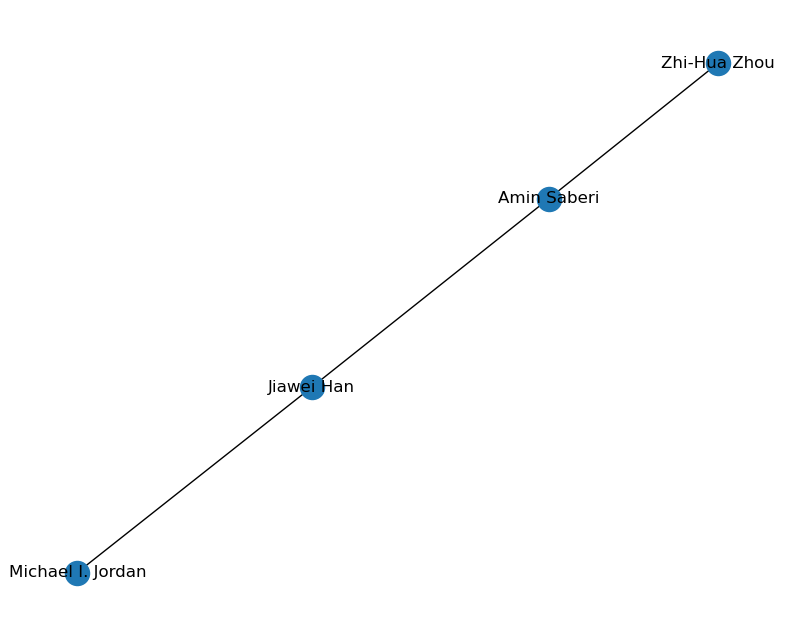

In [21]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the network
nx.draw(G.subgraph(list(best_set)), with_labels=True, ax=ax)

# Show the plot
plt.show()

In [22]:
G.nodes['Robert Kleinberg']

{'label': 'T', 'closeness_centrality': 0.7692307692307693}

In [23]:
from new_utils import crossTeamEff
target = ['Robert Kleinberg']
source = 'Eric P. Xing'
crossTeamEff(G, source, target)

0.1279

In [24]:
def commEff(G, leaders:list):
    inTeam = 0.0
    crossTeam = 0.0
    for node in leaders:
        inTeam += G.nodes[node]['closeness_centrality']

    leaders[0]
    for leader in leaders[1:]:
        shortest_path = nx.shortest_path(G, leaders[0], leader)
        len_shortest_path = len(shortest_path)
        sumDistance = nx.dijkstra_path_length(G, leaders[0], leader, weight='weight')
        closeness = (len_shortest_path)/sumDistance
        crossTeam += closeness
        # print(f"{node} --> {target}: length: {len_shortest_path}, distance: {sumDistance}, closeness: {closeness}")
    return round(10*(crossTeam/(len(leaders)-1)) + inTeam, 4)
    

In [25]:
commEff(G, list(best_set))

6.1911